In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc

In [3]:
file_path_heart = "/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv"
heart_data = pd.read_csv(file_path_heart)

In [4]:
file_path_o2 = "/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv"
oxy_data = pd.read_csv(file_path_o2)

oxy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [5]:
heart_data.describe() # summary of the stats describing the distributions of each variable

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data.isnull().sum() #finds the number of null values in each variable

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* ALWAYS DO THE ABOVE PROMPTS TO GET A FEEL FOR THE DATA AS WELL AS LOOK FOR AREAS TO CLEAN

# Visualisation

Text(0.5, 1.0, 'Distribution of target varable (0 = less likely, 1 = more likely)')

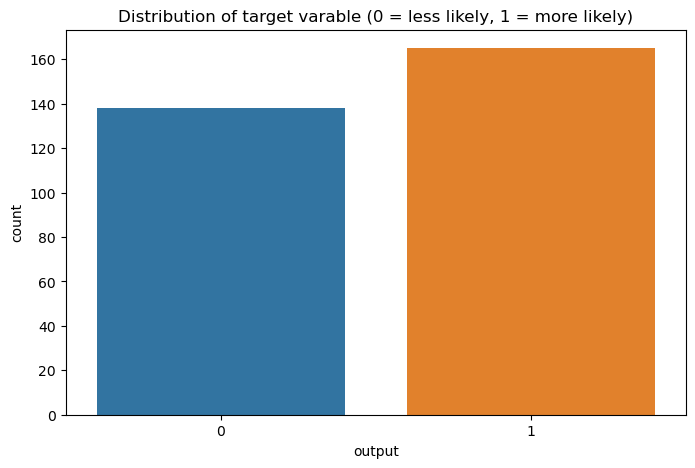

In [9]:
plt.figure(figsize = (8, 5))
sns.countplot(x = heart_data['output'])
plt.title('Distribution of target varable (0 = less likely, 1 = more likely)', size = 12)

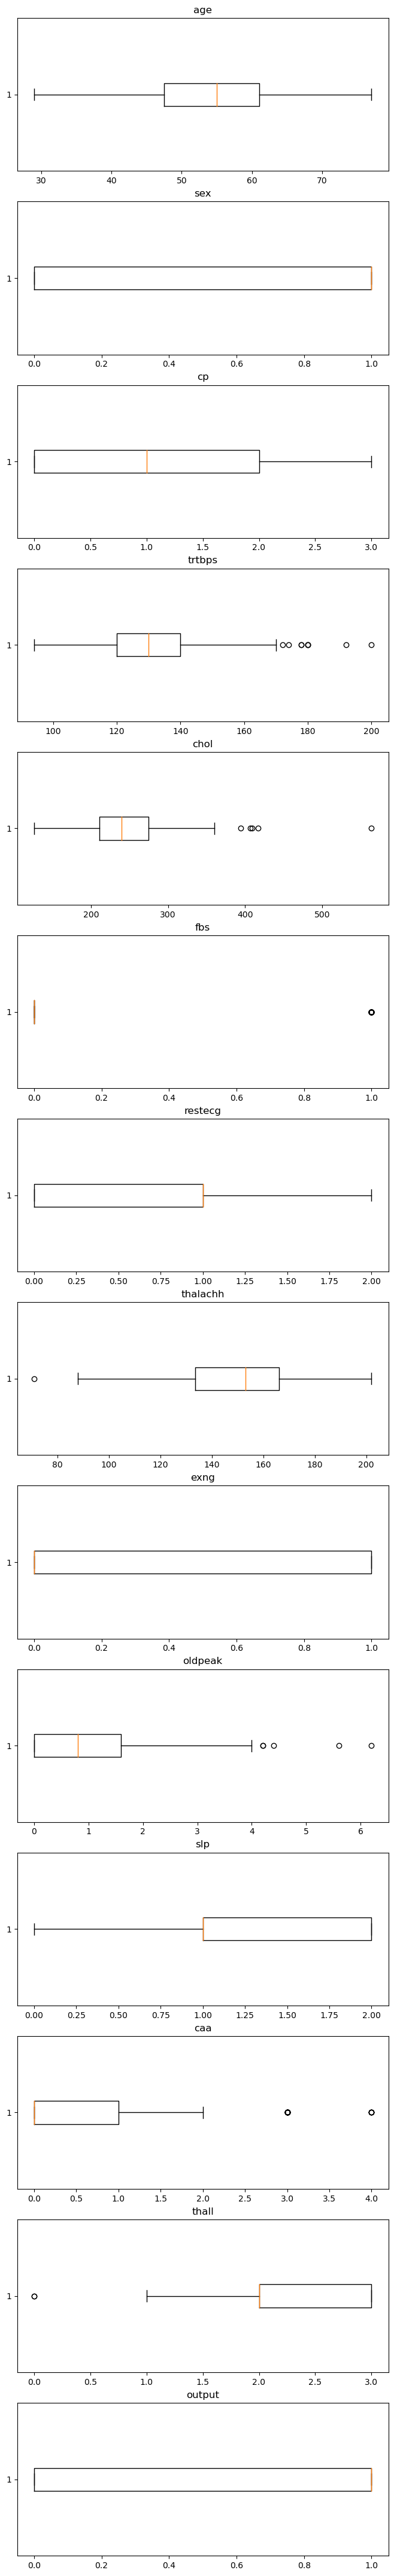

In [10]:
col = heart_data.columns
fgi, ax = plt.subplots(len(heart_data.columns),1 , figsize = (8,55))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(heart_data[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

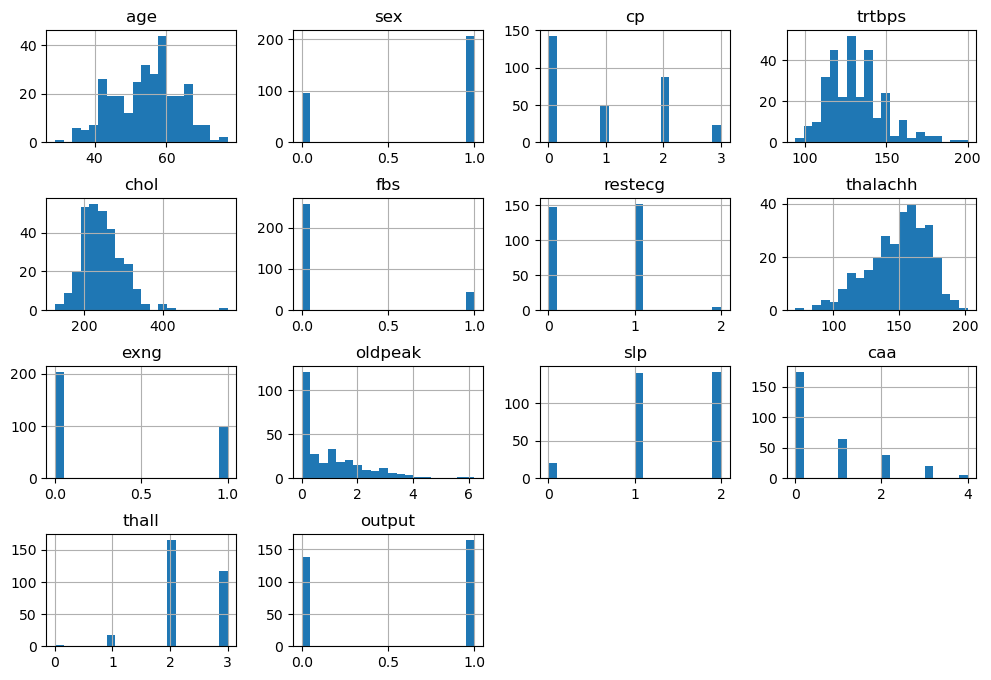

In [11]:
heart_data.hist(figsize=(12, 8), bins=20)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

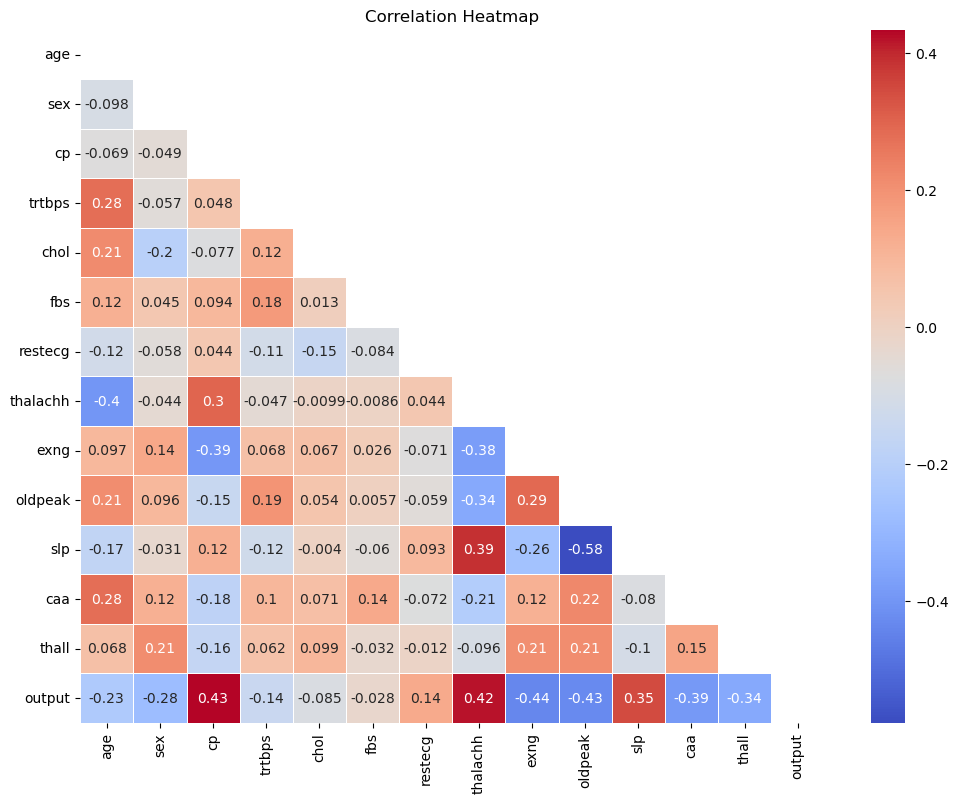

In [12]:
cor = heart_data.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))

plt.figure(figsize=(12, 9))
sns.heatmap(cor, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Build the Model

In [13]:
rel = cor['output'].sort_values(ascending = False)
rel

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [14]:
var = []
for i in range(len(rel)):
    if rel[i] > 0:
        var.append(rel.index[i])
        
print('variables with positive correlation to decide if more or less likely for heart attack:')
print(var)

variables with positive correlation to decide if more or less likely for heart attack:
['output', 'cp', 'thalachh', 'slp', 'restecg']


In [15]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']

X = heart_data[features]


In [16]:
col = X.columns         # standardises the data so each data point has mean of 0 and std = 1
std = StandardScaler()  # This means it is less liable to biases when used in ML models
X = std.fit_transform(X)
X = pd.DataFrame(data = X, columns = col)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [17]:
y = heart_data['output']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Decision Tree

In [19]:
Model_DT = DecisionTreeClassifier()

Model_DT.fit(xtrain, ytrain)

predict = Model_DT.predict(xtest)
print(xtest[:1])
print("Accuracy using Decision Tree is: {} %".format(accuracy_score(predict, ytest)*100))

          age       sex        cp   trtbps      chol       fbs   restecg  \
179  0.290464  0.681005 -0.938515  1.04952  0.574662 -0.417635 -1.005832   

     thalachh      exng   oldpeak       slp       caa     thall  
179 -1.646316  1.435481 -0.379244 -0.649113  0.265082 -2.148873  
Accuracy using Decision Tree is: 78.68852459016394 %


AUC value is 0.8011111111111111


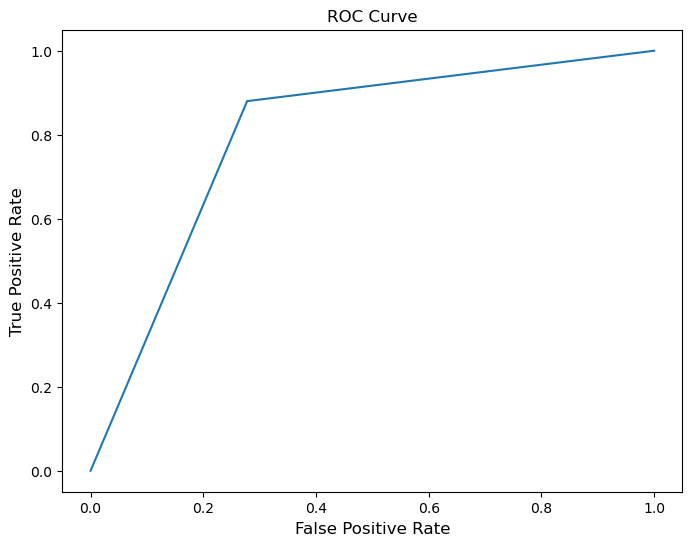

In [20]:
fpr, tpr, threshold = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

# Logistical Regression

In [21]:
lcla = LogisticRegression()
lcla.fit(xtrain, ytrain)
predict = lcla.predict(xtest)

print("Accuracy using Logistic Regression is: {} %".format(accuracy_score(predict, ytest)*100))

Accuracy using Logistic Regression is: 85.24590163934425 %


AUC value is 0.8521505376344087


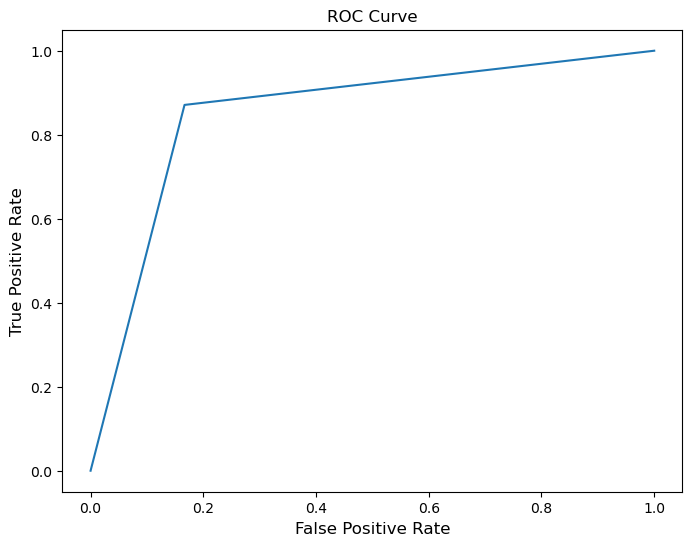

In [22]:
fpr, tpr, threshould = roc_curve(predict, ytest)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
print("AUC value is {}".format(auc(fpr, tpr)))

The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the performance of a binary classification model.

The ROC curve plots the TPR (also known as sensitivity or recall) on the y-axis and the FPR on the x-axis. The TPR is the proportion of positive instances correctly classified as positive, while the FPR is the proportion of negative instances incorrectly classified as positive. The ROC curve shows how the TPR and FPR change as the classification threshold is varied.


> A perfect classifier would have an ROC curve that passes through the top-left corner of the plot, indicating a high TPR and a low FPR at all thresholds. The closer the ROC curve is to the top-left corner, the better the model's performance. A random classifier, on the other hand, would have an ROC curve that is a diagonal line from the bottom-left to the top-right corner.

# K-nearest neighbors (KNN)

****How the k-NN algorithm works for binary classification:

* Training Phase:

The algorithm is provided with a labeled training dataset consisting of feature vectors and their corresponding binary class labels. The feature vectors represent the input variables or attributes, while the class labels represent the target variable. The algorithm stores the training dataset for later use in the classification phase.

* Classification Phase:

When a new, unlabeled test instance is given, the algorithm identifies its k nearest neighbors from the training dataset.
The neighbors are selected based on a distance metric, typically Euclidean distance, which measures the proximity between feature vectors in the feature space.
The value of k is a hyperparameter that determines the number of neighbors to consider. It is typically an odd number to avoid ties in the case of binary classification.
Once the nearest neighbors are identified, the algorithm assigns the class label to the test instance based on the majority class among the k neighbors.
If k = 1, the algorithm assigns the class label of the single nearest neighbor to the test instance.
Voting Mechanism:

The class assignment is determined using a voting mechanism among the k nearest neighbors.
In the case of binary classification, if the majority of the k neighbors belong to Class A, the test instance is classified as Class A. If the majority belong to Class B, the test instance is classified as Class B.
The algorithm can also employ weighted voting, where the neighbors' votes are weighted based on their proximity to the test instance.
The k-NN algorithm does not involve an explicit training process but relies on the stored training dataset for classification. It assumes that instances with similar feature vectors are likely to belong to the same class.

> It's important to note that k-NN is a lazy learning algorithm, meaning it does not build a model during training but directly uses the training dataset for classification. The algorithm's performance can be influenced by factors such as the choice of distance metric, the value of k, and the quality and representativeness of the training dataset.

In [23]:
acc_list = []
maxi = 0
ind = 0
best = 0
best_predict = 0

for no_neighbors in range(3, 30):
    kcla = KNeighborsClassifier(n_neighbors = no_neighbors) # define our model 
    kcla.fit(xtrain, ytrain)                  # fit model on training data
    predict = kcla.predict(xtest)             # predict the y-values for x-values in test data
    acc = accuracy_score(predict, ytest)      # compare predicted y to actual y for accuracy
    acc_list.append(acc)
    
    if maxi < acc:             # find maximum accuracy and associated parameters for best run
        maxi = acc 
        ind = no_neighbors
        best = acc
        best_predict = predict

Accuracy using K Nearest Neighbors is: 93.44262295081968 %


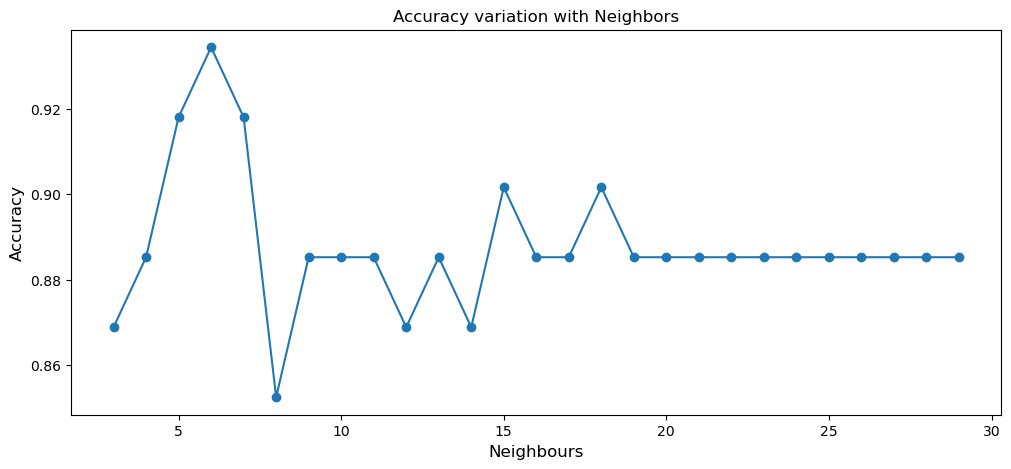

In [24]:
plt.figure(figsize = (12,5))
plt.plot(range (3, 30), acc_list, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)
print("Accuracy using K Nearest Neighbors is: {} %".format(best*100))

# Finding if a patients details suggest heart attack likely

In [25]:
print('Enter the patients medical details:')

age_pat       = input('Age : Age of the patient ')
sex_pat       = input('Sex (Male=0, Female=1): ')
cp_pat        = input("""chest pain: 
1: typical angina
2: atypical angina
3: non-anginal pain
4: asymptomatic: 
""")
trtbps_pat    = input('trtbps : resting blood pressure (in mm Hg) (int) ')
chol_pat      = input('chol : cholestoral in mg/dl fetched via BMI sensor (int) ')
fbs_pat       = input('fbs (no = 0, yes = 1): ')
restecg_pat   = input("""rest_ecg : resting electrocardiographic results
0: normal
1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: showing probable or definite left ventricular hypertrophy by Estes' criteria
""")
thalachh_pat  = input('thalachh (int): ')
exng_pat      = input('exercise induced angina (1 = yes; 0 = no): ')
oldpeak_pat   = input('oldpeak (float to 1 d.p): ')
slp_pat       = input('slp (0, 1 or 2): ')
caa_pat       = input('ca: number of major vessels (0-3) ')
thall_pat     = input('thall (0,1,2): ')


Features_pat = [age_pat, sex_pat, cp_pat, trtbps_pat, chol_pat, fbs_pat, restecg_pat, thalachh_pat, exng_pat, oldpeak_pat, slp_pat, caa_pat, thall_pat]


Enter the patients medical details:


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [ ]:
# Create the dictionary with column names and values
patient_features = {
    'age': [age_pat],
    'sex': [sex_pat],
    'cp': [cp_pat],
    'trtbps': [trtbps_pat],
    'chol': [chol_pat],
    'fbs': [fbs_pat],
    'restecg': [restecg_pat],
    'thalachh': [thalachh_pat],
    'exng': [exng_pat],
    'oldpeak': [oldpeak_pat],
    'slp': [slp_pat],
    'caa': [caa_pat],
    'thall': [thall_pat]
}

# Convert the dictionary to a DataFrame
X_pat = pd.DataFrame(patient_features)

In [ ]:
col = X_pat.columns         # standardises the data so each data point has mean of 0 and std = 1
std = StandardScaler()      # This means it is less liable to biases when used in ML models
X_pat = std.fit_transform(X_pat)
X_pat = pd.DataFrame(data = X_pat, columns = col)
X_pat.head()

In [ ]:
kcla = KNeighborsClassifier(n_neighbors = 6) # define our model 
kcla.fit(xtrain, ytrain)                  # fit model on training data
predict = kcla.predict(xtest)             # predict the y-values for x-values in test data
acc = accuracy_score(predict, ytest)      # compare predicted y to actual y for accuracy
acc_list.append(acc)


In [ ]:
pred_lcla = lcla.predict(X_pat)
pred_DT   = Model_DT.predict(X_pat)
pred_kcla = kcla.predict(X_pat) 

print('Decision Tree (78.6% accuracy):')
if pred_DT == 0:
    print("""Patient unlikely to have heart attack
    """)
if pred_DT == 1:
    print("""Patient more likely to have heart attack
    """)

print('Logistical Regression (85.2% accuracy):')
if pred_lcla == 0:
    print("""Patient unlikely to have heart attack
    """)
if pred_lcla == 1:
    print("""Patient more likely to have heart attack
    """)
    
print('K-Nearest Neighbors where n=6 (93.4 % accuracy):')
if pred_kcla == 0:
    print("""Patient unlikely to have heart attack
    """)
if pred_kcla == 1:
    print("""Patient more likely to have heart attack
    """)
    


* We have disagreement between our models for this patients details -> do an investigation as to why this may be ? differences between the methods by which they work? 